In [1]:
import weave
proj_name = "CHATBOT-TLCN"
client = weave.init(proj_name)

weave version 0.51.51 is available!  To upgrade, please run:
 $ pip install weave --upgrade
Logged in as Weights & Biases user: phatnguyen-041203.
View Weave data at https://wandb.ai/tlcn/CHATBOT-TLCN/weave


In [22]:
faqs_evaluation_run_id = "019736c4-b55e-7d31-b8e5-fd2b2f20c8c7"

faqs_call = client.get_call(faqs_evaluation_run_id)

In [8]:
print(faqs_call)

WeaveObject(Call(_op_name='weave:///tlcn/CHATBOT-TLCN/op/Evaluation.evaluate:4zMa2z43pY0tRhlI5DsqqhuX4rGWBZSi6TtkLREfpTc', trace_id='019736c4-b55e-7d31-b8e5-fd176d677952', project_id='tlcn/CHATBOT-TLCN', parent_id=None, inputs={'self': ObjectRef(entity='tlcn', project='CHATBOT-TLCN', name='FAQ-Evaluation', _digest='R3xkHvqvBiKCK1l6bvmOuPYrMdN8SR5tOBEj73X6Mqg', _extra=()), 'model': OpRef(entity='tlcn', project='CHATBOT-TLCN', name='get_faq_test_case', _digest='Icap8UAtAksPYfL4D6dof3XtkRFYMNSH4gmUItqfZpI', _extra=())}, id='019736c4-b55e-7d31-b8e5-fd2b2f20c8c7', output={'evaluate_faq': {'ContextualPrecisionMetric': {'mean': 0.8295321637426901}, 'AnswerRelevancyMetric': {'mean': 0.8436846100236192}, 'FaithfulnessMetric': {'mean': 0.9537656641604011}}, 'model_latency': {'mean': 30.00909401617552}}, exception=None, summary={'usage': {'text-embedding-3-small': {'prompt_tokens': 16679, 'requests': 380, 'total_tokens': 16679}, 'gpt-4o-mini-2024-07-18': {'prompt_tokens': 343916, 'completion_toke

In [10]:
print(faqs_call.output)

WeaveDict({'evaluate_faq': {'ContextualPrecisionMetric': {'mean': 0.8295321637426901}, 'AnswerRelevancyMetric': {'mean': 0.8436846100236192}, 'FaithfulnessMetric': {'mean': 0.9537656641604011}}, 'model_latency': {'mean': 30.00909401617552}})


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

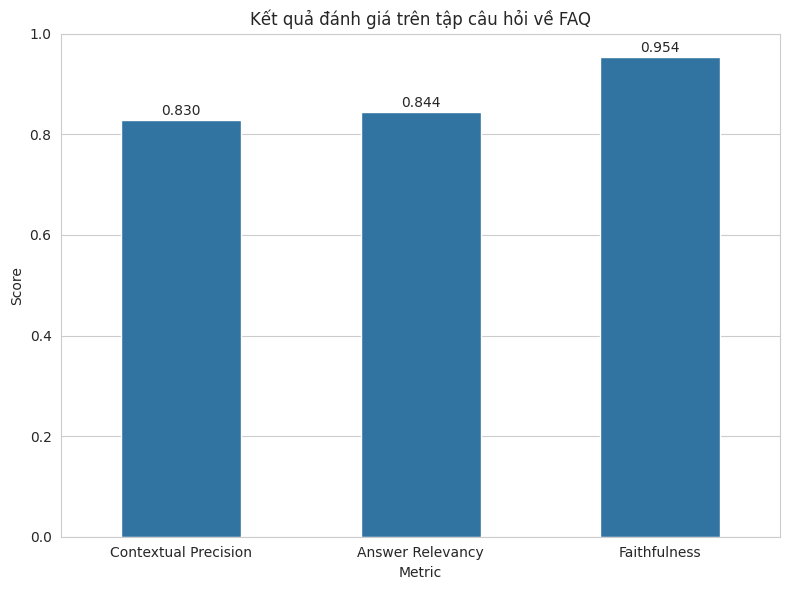


DataFrame:
                 Metric     Score
0  Contextual Precision  0.829532
1      Answer Relevancy  0.843685
2          Faithfulness  0.953766


In [25]:
metrics_data = faqs_call.output['evaluate_faq']
# Create a DataFrame
df = pd.DataFrame({
    'Metric': ['Contextual Precision', 'Answer Relevancy', 'Faithfulness'],
    'Score': [
        metrics_data['ContextualPrecisionMetric']['mean'],
        metrics_data['AnswerRelevancyMetric']['mean'],
        metrics_data['FaithfulnessMetric']['mean']
    ]
})

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Metric', y='Score', width=0.5)
plt.title('Kết quả đánh giá trên tập câu hỏi về FAQ')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 since scores are between 0 and 1
plt.xticks(rotation=0)
plt.tight_layout()

# Add value labels on top of each bar
for i, v in enumerate(df['Score']):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Show the plot
plt.show()

# Print the DataFrame
print("\nDataFrame:")
print(df)

In [11]:
phones_evaluation_run_id = "01973700-1995-7391-b09b-3837194e3ba6"
laptop_evaluation_run_id = "019738d1-7535-7402-9b26-b1351bd6fcd1"   
phones_call = client.get_call(phones_evaluation_run_id)
laptop_call = client.get_call(laptop_evaluation_run_id)




In [12]:
print(phones_call.output)
print(laptop_call.output)

WeaveDict({'output': {'phone': {'data': {'price': {'mean': 13180800.0}, 'score': {'mean': 12.437378400000002}, 'currentPrice': {'mean': 11193000.0}, 'originalPrice': {'mean': 13180800.0}, 'totalInventory': {'mean': 0.0}, 'discountPercentage': {'mean': 11.24}}, 'min_price': {'mean': 10841000.0}, 'max_price': {'mean': 12801000.0}, 'score': {'mean': 12.437378400000002}}, 'age': {'mean': 32.64}, 'min_budget': {'mean': 9000000.0}, 'max_budget': {'mean': 14880000.0}, 'response_format': {'json_schema': {'strict': {'true_count': 25, 'true_fraction': 1.0}, 'schema': {'additionalProperties': {'true_count': 0, 'true_fraction': 0.0}}}}, 'thread': {'is_active': {'true_count': 25, 'true_fraction': 1.0}}}, 'evaluate_conversation': {'faithfulness_score': {'mean': 0.9469830663604474}, 'role_adherence_score': {'mean': 1.0}}, 'model_latency': {'mean': 32.57547787666321}})
WeaveDict({'output': {'laptop': {'data': {'price': {'mean': 18754000.0}, 'score': {'mean': 16.72377704}, 'currentPrice': {'mean': 1626

In [13]:
phones_metrics = phones_call.output['evaluate_conversation']
laptop_metrics = laptop_call.output['evaluate_laptop_conversation']

In [16]:
df_phones = pd.DataFrame({
    'Metric': ['Role Adherence', 'Faithfulness'],
    'Score': [
        phones_metrics['role_adherence_score']['mean'],
        phones_metrics['faithfulness_score']['mean']
    ]
})

df_laptop = pd.DataFrame({
    'Metric': ['Role Adherence', 'Faithfulness'],
    'Score': [
        laptop_metrics['role_adherence_score']['mean'],
        laptop_metrics['faithfulness_score']['mean']
    ]
})


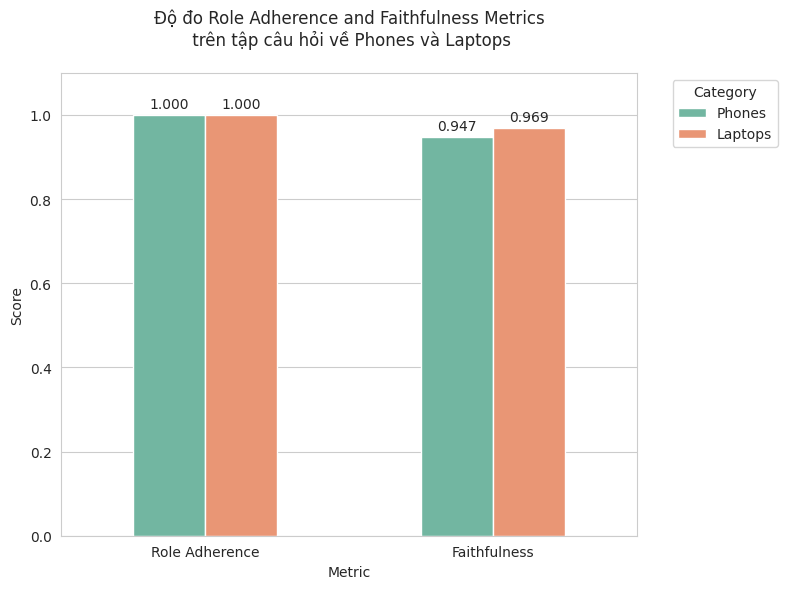


Combined DataFrame:
           Metric     Score Category
0  Role Adherence  1.000000   Phones
1    Faithfulness  0.946983   Phones
0  Role Adherence  1.000000  Laptops
1    Faithfulness  0.968808  Laptops


In [19]:
# Create a combined DataFrame with a category column
df_phones['Category'] = 'Phones'
df_laptop['Category'] = 'Laptops'
df_combined = pd.concat([df_phones, df_laptop])

# Create the visualization
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

# Create grouped bar plot
ax = sns.barplot(data=df_combined, x='Metric', y='Score', hue='Category', palette='Set2', width=0.5)

# Customize the plot
plt.title('Độ đo Role Adherence and Faithfulness Metrics\n trên tập câu hỏi về Phones và Laptops', pad=20)
plt.ylim(0, 1.1)  # Add some space at the top for labels
plt.ylabel('Score')
plt.xlabel('Metric')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3)

# Customize legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the combined DataFrame
print("\nCombined DataFrame:")
print(df_combined)

In [1]:
from service.email import _authenticate_gmail
_authenticate_gmail()

RefreshError: ('invalid_grant: Token has been expired or revoked.', {'error': 'invalid_grant', 'error_description': 'Token has been expired or revoked.'})

In [4]:
from service.wandb import *
from evaluate_phone import VietnameseUserSimulator

dataset = weave.ref("Phone-Evaluation-Dataset").get()
simulated_user = dataset.rows[0]['simulated_user']
simulated_user = VietnameseUserSimulator.model_validate_json(simulated_user)

for message in simulated_user.conversation_history:
    if message['role'] == 'user':
        print("\033[32mUser:\033[0m")
        print(message['content'])
    elif message['role'] == 'assistant':
        print("\033[34mAssistant\033[0m")
        print(message['content'])


RefreshError: ('invalid_grant: Token has been expired or revoked.', {'error': 'invalid_grant', 'error_description': 'Token has been expired or revoked.'})

In [ ]:
from service.wandb import *
from evaluate_laptop import VietnameseLaptopUserSimulator

dataset = weave.ref("Laptop-Evaluation-Dataset").get()
simulated_user = dataset.rows[0]["simulated_user"]
simulated_user = VietnameseLaptopUserSimulator.model_validate_json(simulated_user)

for message in simulated_user.conversation_history:
    if message["role"] == "user":
        print("\033[32mUser:\033[0m")
        print(message["content"])
    elif message["role"] == "assistant":
        print("\033[34mAssistant\033[0m")
        print(message["content"])

In [3]:
import json
import os
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path

def analyze_tags():
    # Directory containing JSON files
    json_dir = "exported_comments"
    
    # List to store all tags
    all_tags = []
    
    # Read all JSON files in the directory
    for filename in os.listdir(json_dir):
        if filename.endswith('.json'):
            file_path = os.path.join(json_dir, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    
                    # Extract tags from top-level comments only
                    if 'comments' in data:
                        for comment in data['comments']:
                            if 'tags' in comment:
                                all_tags.extend(comment['tags'])
            except Exception as e:
                print(f"Error reading {filename}: {str(e)}")
    
    # Count tag frequencies
    tag_counts = Counter(all_tags)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Tag': list(tag_counts.keys()),
        'Count': list(tag_counts.values())
    })
    df = df.sort_values('Count', ascending=False)
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100
    ).generate_from_frequencies(tag_counts)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Tag Distribution Word Cloud')
    plt.savefig('tag_wordcloud.png')
    plt.close()
    
    # Save DataFrame to CSV
    df.to_csv('tag_statistics.csv', index=False, encoding='utf-8')
    
    return df, wordcloud

# Run the analysis
tag_stats, wordcloud = analyze_tags()
print("\nTop 10 most common tags:")
print(tag_stats.head(10))

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tag Distribution Word Cloud')
plt.savefig('tag_wordcloud.png')
plt.close()


Top 10 most common tags:
                    Tag  Count
4       tình trạng hàng    124
0     thông số kỹ thuật     91
6        thu cũ đổi mới     66
2            khuyến mãi     58
14   chính sách trả góp     53
3   chính sách bán hàng     50
16            phiên bản     47
7    thông tin sản phẩm     44
18               giá cả     27
1              màn hình     27



Top 10 most common tags:
                    Tag  Count
4       tình trạng hàng    124
0     thông số kỹ thuật     91
6        thu cũ đổi mới     66
2            khuyến mãi     58
14   chính sách trả góp     53
3   chính sách bán hàng     50
16            phiên bản     47
7    thông tin sản phẩm     44
18               giá cả     27
1              màn hình     27


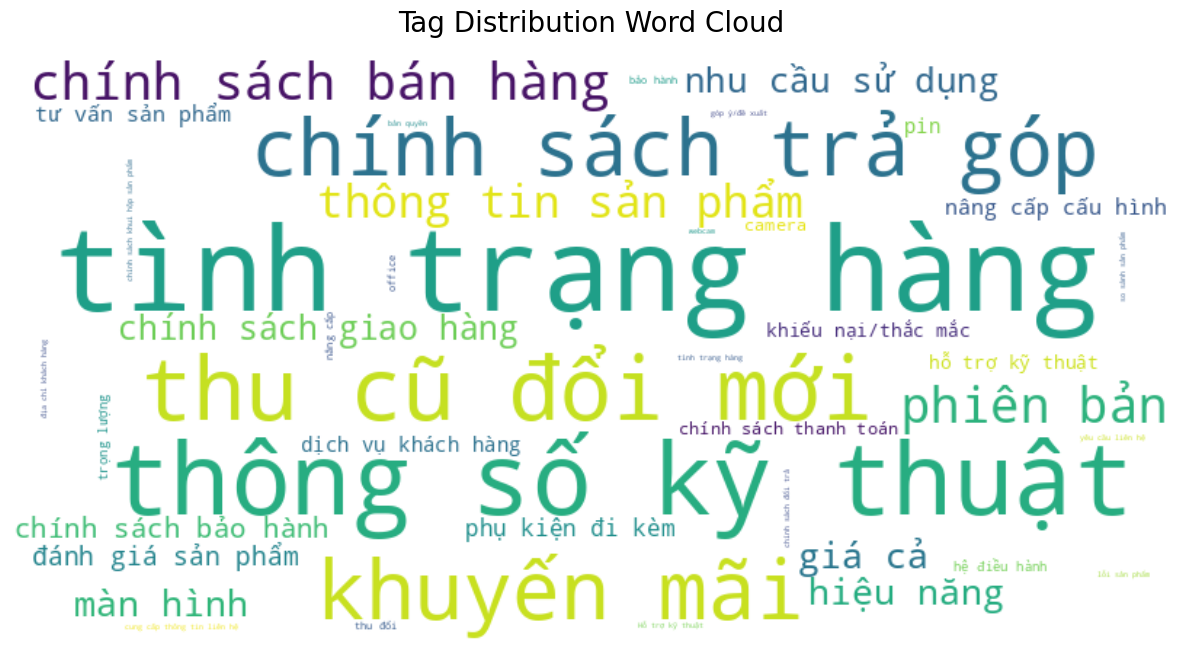

In [4]:
import json
import os
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path

def analyze_tags():
    # Directory containing JSON files
    json_dir = "exported_comments"
    
    # List to store all tags
    all_tags = []
    
    # Read all JSON files in the directory
    for filename in os.listdir(json_dir):
        if filename.endswith('.json'):
            file_path = os.path.join(json_dir, filename)
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    data = json.load(f)
                    
                    # Extract tags from top-level comments only
                    if 'comments' in data:
                        for comment in data['comments']:
                            if 'tags' in comment:
                                all_tags.extend(comment['tags'])
            except Exception as e:
                print(f"Error reading {filename}: {str(e)}")
    
    # Count tag frequencies
    tag_counts = Counter(all_tags)
    
    # Create DataFrame
    df = pd.DataFrame({
        'Tag': list(tag_counts.keys()),
        'Count': list(tag_counts.values())
    })
    df = df.sort_values('Count', ascending=False)
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100
    ).generate_from_frequencies(tag_counts)
    
    # Plot word cloud
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Tag Distribution Word Cloud', fontsize=20, pad=20)
    
    # Save DataFrame to CSV
    df.to_csv('tag_statistics.csv', index=False, encoding='utf-8')
    
    return df, wordcloud

# Run the analysis
tag_stats, wordcloud = analyze_tags()
print("\nTop 10 most common tags:")
print(tag_stats.head(10))

# Display the wordcloud
plt.show()